In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error, peak_signal_noise_ratio
from skimage.restoration import denoise_nl_means, estimate_sigma
import warnings
warnings.filterwarnings('ignore')

# Лабораторная работа №2: Фильтрация шумов

## Задачи:
1. Зашумить изображение при помощи шума Гаусса и постоянного шума
2. Протестировать фильтры:
   - Медианный фильтр
   - Фильтр Гаусса
   - Билатериальный фильтр
   - Фильтр нелокальных средних
3. Выяснить какой фильтр показал лучший результат

## 1. Загрузка изображения

In [2]:
image = cv2.imread('img.jpg')

In [3]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

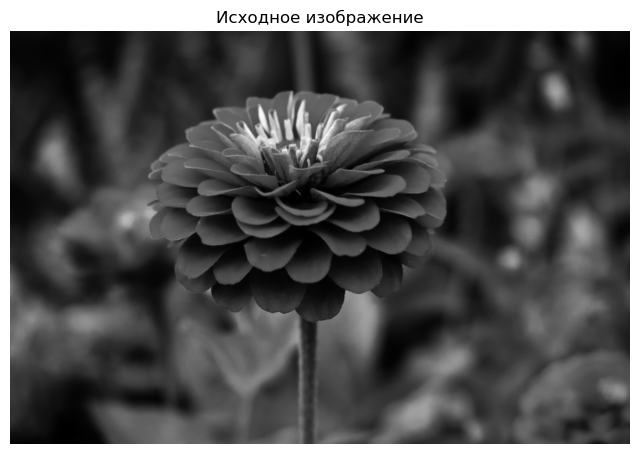

In [4]:
plt.figure(figsize=(8, 6))
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

## 2. Добавление шума

### 2.1 Гауссовский шум

In [5]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Добавление гауссовского шума
    
    Parameters:
    -----------
    image : numpy.ndarray
        Входное изображение
    mean : float
        Среднее значение шума
    sigma : float
        Стандартное отклонение шума
    
    Returns:
    --------
    numpy.ndarray
        Зашумленное изображение
    """
    gaussian = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

In [6]:
noisy_gaussian = add_gaussian_noise(image_gray, mean=0, sigma=25)

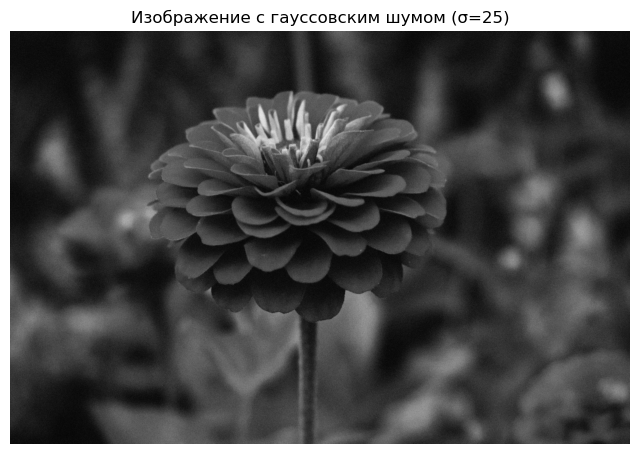

In [7]:
plt.figure(figsize=(8, 6))
plt.imshow(noisy_gaussian, cmap='gray')
plt.title('Изображение с гауссовским шумом (σ=25)')
plt.axis('off')
plt.show()

### 2.2 Постоянный шум (Salt and Pepper)

In [8]:
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """
    Добавление импульсного шума (соль и перец)
    
    Parameters:
    -----------
    image : numpy.ndarray
        Входное изображение
    salt_prob : float
        Вероятность белого пикселя (соль)
    pepper_prob : float
        Вероятность черного пикселя (перец)
    
    Returns:
    --------
    numpy.ndarray
        Зашумленное изображение
    """
    noisy_image = image.copy()
    
    # Соль (белые пиксели)
    salt_mask = np.random.random(image.shape) < salt_prob
    noisy_image[salt_mask] = 255
    
    # Перец (черные пиксели)
    pepper_mask = np.random.random(image.shape) < pepper_prob
    noisy_image[pepper_mask] = 0
    
    return noisy_image

In [9]:
noisy_sp = add_salt_pepper_noise(image_gray, salt_prob=0.02, pepper_prob=0.02)

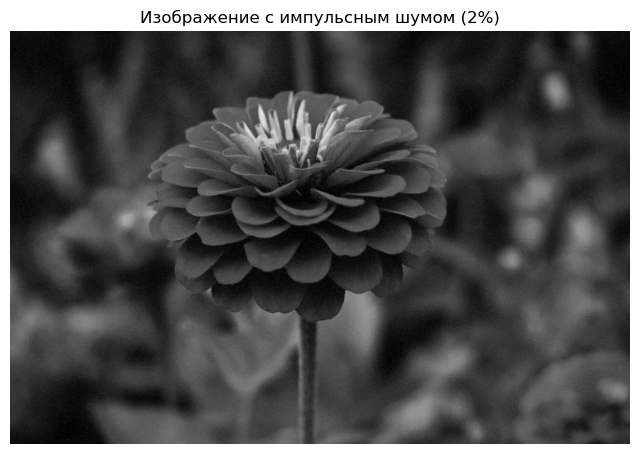

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(noisy_sp, cmap='gray')
plt.title('Изображение с импульсным шумом (2%)')
plt.axis('off')
plt.show()

### 2.3 Сравнение зашумленных изображений

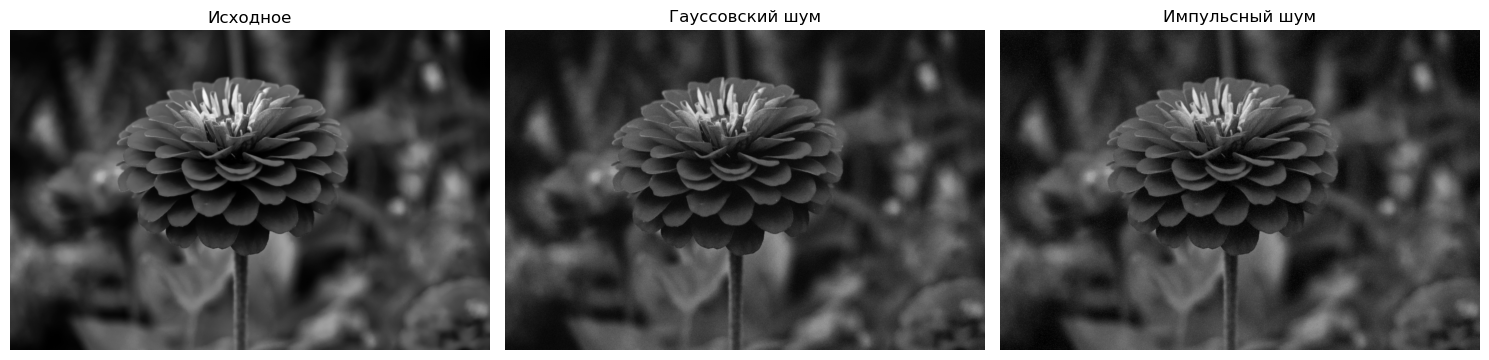

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Исходное')
axes[0].axis('off')

axes[1].imshow(noisy_gaussian, cmap='gray')
axes[1].set_title('Гауссовский шум')
axes[1].axis('off')

axes[2].imshow(noisy_sp, cmap='gray')
axes[2].set_title('Импульсный шум')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 3. Применение фильтров к гауссовскому шуму

### 3.1 Медианный фильтр

In [12]:
median_3 = cv2.medianBlur(noisy_gaussian, 3)

In [13]:
median_5 = cv2.medianBlur(noisy_gaussian, 5)

In [14]:
median_7 = cv2.medianBlur(noisy_gaussian, 7)

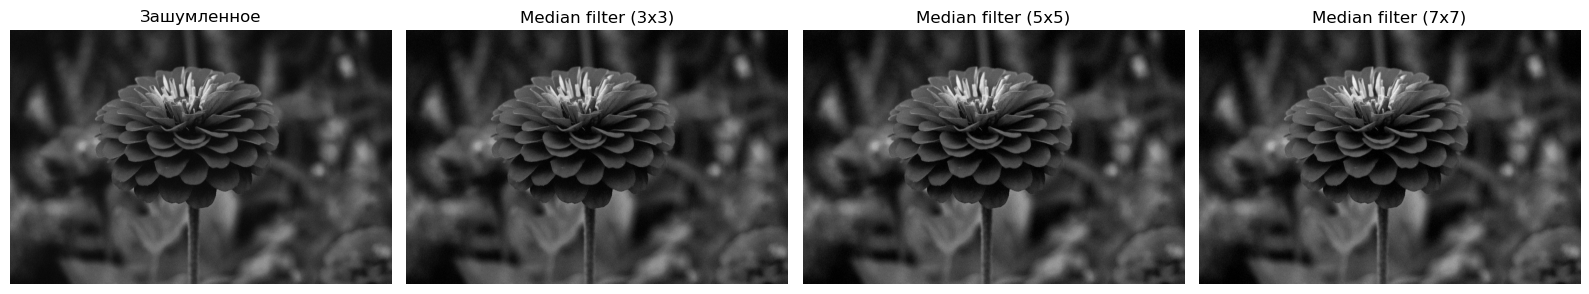

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(noisy_gaussian, cmap='gray')
axes[0].set_title('Зашумленное')
axes[0].axis('off')

axes[1].imshow(median_3, cmap='gray')
axes[1].set_title('Median filter (3x3)')
axes[1].axis('off')

axes[2].imshow(median_5, cmap='gray')
axes[2].set_title('Median filter (5x5)')
axes[2].axis('off')

axes[3].imshow(median_7, cmap='gray')
axes[3].set_title('Median filter (7x7)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

### 3.2 Фильтр Гаусса

In [16]:
gaussian_3 = cv2.GaussianBlur(noisy_gaussian, (3, 3), 0)

In [17]:
gaussian_5 = cv2.GaussianBlur(noisy_gaussian, (5, 5), 0)

In [18]:
gaussian_7 = cv2.GaussianBlur(noisy_gaussian, (7, 7), 0)

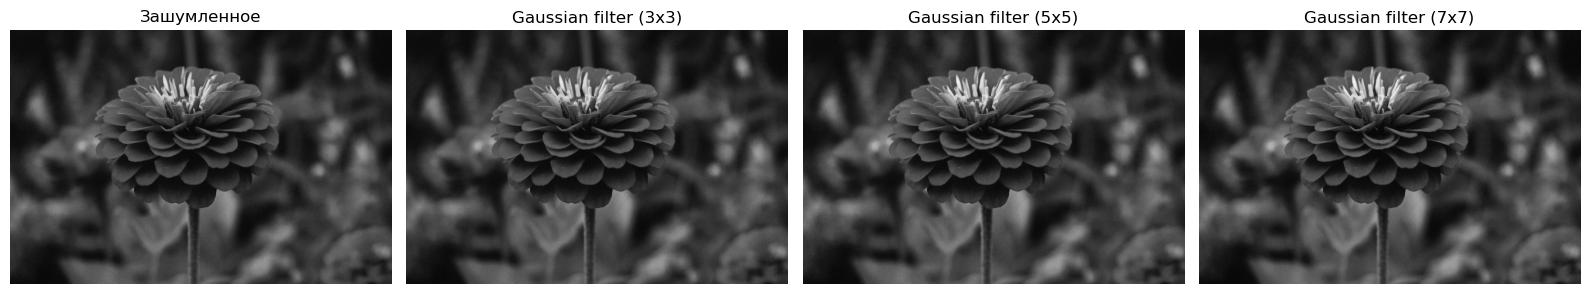

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(noisy_gaussian, cmap='gray')
axes[0].set_title('Зашумленное')
axes[0].axis('off')

axes[1].imshow(gaussian_3, cmap='gray')
axes[1].set_title('Gaussian filter (3x3)')
axes[1].axis('off')

axes[2].imshow(gaussian_5, cmap='gray')
axes[2].set_title('Gaussian filter (5x5)')
axes[2].axis('off')

axes[3].imshow(gaussian_7, cmap='gray')
axes[3].set_title('Gaussian filter (7x7)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

### 3.3 Билатериальный фильтр

In [20]:
bilateral_5 = cv2.bilateralFilter(noisy_gaussian, 5, 75, 75)

In [21]:
bilateral_9 = cv2.bilateralFilter(noisy_gaussian, 9, 75, 75)

In [22]:
bilateral_15 = cv2.bilateralFilter(noisy_gaussian, 15, 75, 75)

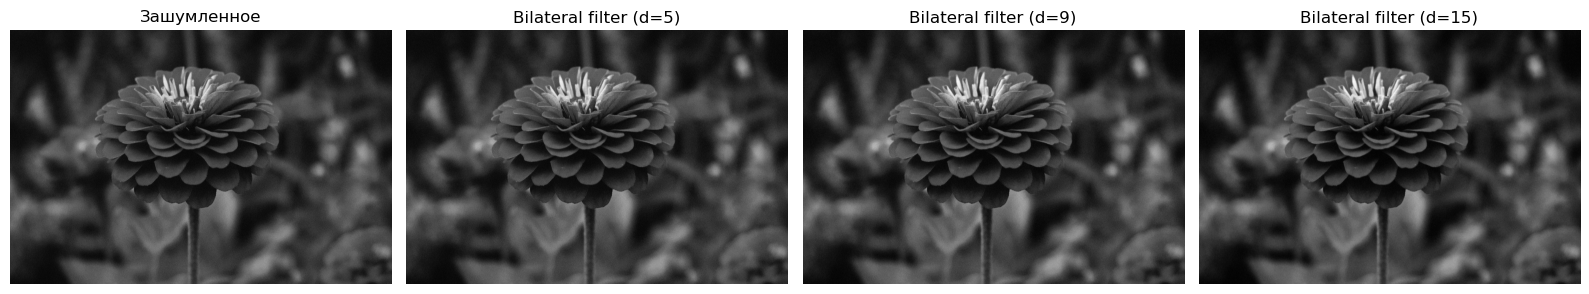

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(noisy_gaussian, cmap='gray')
axes[0].set_title('Зашумленное')
axes[0].axis('off')

axes[1].imshow(bilateral_5, cmap='gray')
axes[1].set_title('Bilateral filter (d=5)')
axes[1].axis('off')

axes[2].imshow(bilateral_9, cmap='gray')
axes[2].set_title('Bilateral filter (d=9)')
axes[2].axis('off')

axes[3].imshow(bilateral_15, cmap='gray')
axes[3].set_title('Bilateral filter (d=15)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

### 3.4 Фильтр нелокальных средних (Non-local Means)

In [24]:
# Оценка уровня шума
sigma_est = np.mean(estimate_sigma(noisy_gaussian))
print(f'Оценка уровня шума: {sigma_est:.2f}')

Оценка уровня шума: 23.09


In [25]:
nlm_fast = cv2.fastNlMeansDenoising(noisy_gaussian, None, 10, 7, 21)

In [26]:
nlm_strong = cv2.fastNlMeansDenoising(noisy_gaussian, None, 20, 7, 21)

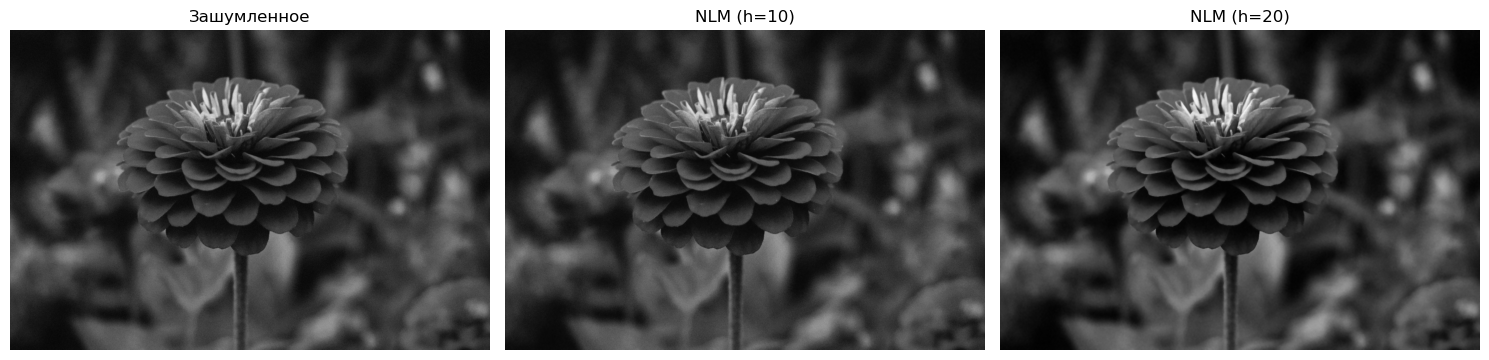

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(noisy_gaussian, cmap='gray')
axes[0].set_title('Зашумленное')
axes[0].axis('off')

axes[1].imshow(nlm_fast, cmap='gray')
axes[1].set_title('NLM (h=10)')
axes[1].axis('off')

axes[2].imshow(nlm_strong, cmap='gray')
axes[2].set_title('NLM (h=20)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 4. Применение фильтров к импульсному шуму

In [28]:
sp_median = cv2.medianBlur(noisy_sp, 5)

In [29]:
sp_gaussian = cv2.GaussianBlur(noisy_sp, (5, 5), 0)

In [30]:
sp_bilateral = cv2.bilateralFilter(noisy_sp, 9, 75, 75)

In [31]:
sp_nlm = cv2.fastNlMeansDenoising(noisy_sp, None, 10, 7, 21)

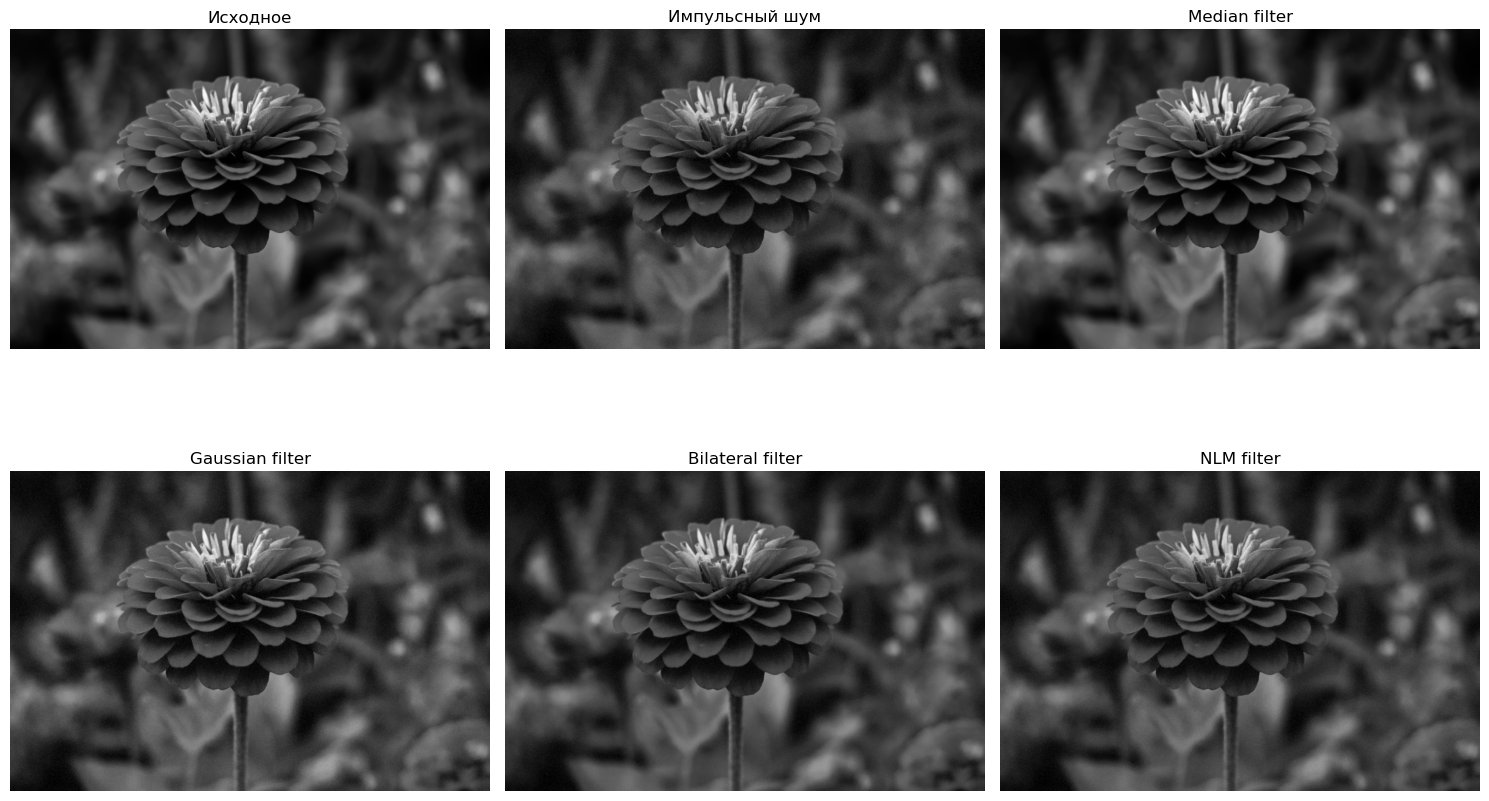

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title('Исходное')
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_sp, cmap='gray')
axes[0, 1].set_title('Импульсный шум')
axes[0, 1].axis('off')

axes[0, 2].imshow(sp_median, cmap='gray')
axes[0, 2].set_title('Median filter')
axes[0, 2].axis('off')

axes[1, 0].imshow(sp_gaussian, cmap='gray')
axes[1, 0].set_title('Gaussian filter')
axes[1, 0].axis('off')

axes[1, 1].imshow(sp_bilateral, cmap='gray')
axes[1, 1].set_title('Bilateral filter')
axes[1, 1].axis('off')

axes[1, 2].imshow(sp_nlm, cmap='gray')
axes[1, 2].set_title('NLM filter')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 5. Сравнение результатов с помощью метрик

### 5.1 Метрики для гауссовского шума

In [33]:
# Словарь с результатами фильтрации
gaussian_results = {
    'Median 3x3': median_3,
    'Median 5x5': median_5,
    'Gaussian 5x5': gaussian_5,
    'Bilateral d=9': bilateral_9,
    'NLM h=10': nlm_fast,
    'NLM h=20': nlm_strong
}

In [34]:
print("="*70)
print("СРАВНЕНИЕ ФИЛЬТРОВ ДЛЯ ГАУССОВСКОГО ШУМА")
print("="*70)
print(f"{'Фильтр':<20} {'MSE':<15} {'PSNR':<15} {'SSIM':<15}")
print("-"*70)

for name, filtered_img in gaussian_results.items():
    mse = mean_squared_error(image_gray, filtered_img)
    psnr = peak_signal_noise_ratio(image_gray, filtered_img)
    ssim = structural_similarity(image_gray, filtered_img)
    print(f"{name:<20} {mse:<15.2f} {psnr:<15.2f} {ssim:<15.4f}")

print("="*70)

СРАВНЕНИЕ ФИЛЬТРОВ ДЛЯ ГАУССОВСКОГО ШУМА
Фильтр               MSE             PSNR            SSIM           
----------------------------------------------------------------------
Median 3x3           107.97          27.80           0.4238         
Median 5x5           50.10           31.13           0.6188         
Gaussian 5x5         53.80           30.82           0.6180         
Bilateral d=9        30.79           33.25           0.7484         
NLM h=10             518.10          20.99           0.1678         
NLM h=20             22.49           34.61           0.7986         


### 5.2 Метрики для импульсного шума

In [35]:
sp_results = {
    'Median 5x5': sp_median,
    'Gaussian 5x5': sp_gaussian,
    'Bilateral d=9': sp_bilateral,
    'NLM h=10': sp_nlm
}

In [36]:
print("="*70)
print("СРАВНЕНИЕ ФИЛЬТРОВ ДЛЯ ИМПУЛЬСНОГО ШУМА")
print("="*70)
print(f"{'Фильтр':<20} {'MSE':<15} {'PSNR':<15} {'SSIM':<15}")
print("-"*70)

for name, filtered_img in sp_results.items():
    mse = mean_squared_error(image_gray, filtered_img)
    psnr = peak_signal_noise_ratio(image_gray, filtered_img)
    ssim = structural_similarity(image_gray, filtered_img)
    print(f"{name:<20} {mse:<15.2f} {psnr:<15.2f} {ssim:<15.4f}")

print("="*70)

СРАВНЕНИЕ ФИЛЬТРОВ ДЛЯ ИМПУЛЬСНОГО ШУМА
Фильтр               MSE             PSNR            SSIM           
----------------------------------------------------------------------
Median 5x5           12.09           37.31           0.8559         
Gaussian 5x5         82.94           28.94           0.5789         
Bilateral d=9        376.25          22.38           0.4618         
NLM h=10             858.04          18.80           0.3430         


## 6. Визуализация метрик

In [37]:
# Расчет метрик для графиков
filter_names = list(gaussian_results.keys())
mse_values = []
psnr_values = []
ssim_values = []

for filtered_img in gaussian_results.values():
    mse_values.append(mean_squared_error(image_gray, filtered_img))
    psnr_values.append(peak_signal_noise_ratio(image_gray, filtered_img))
    ssim_values.append(structural_similarity(image_gray, filtered_img))

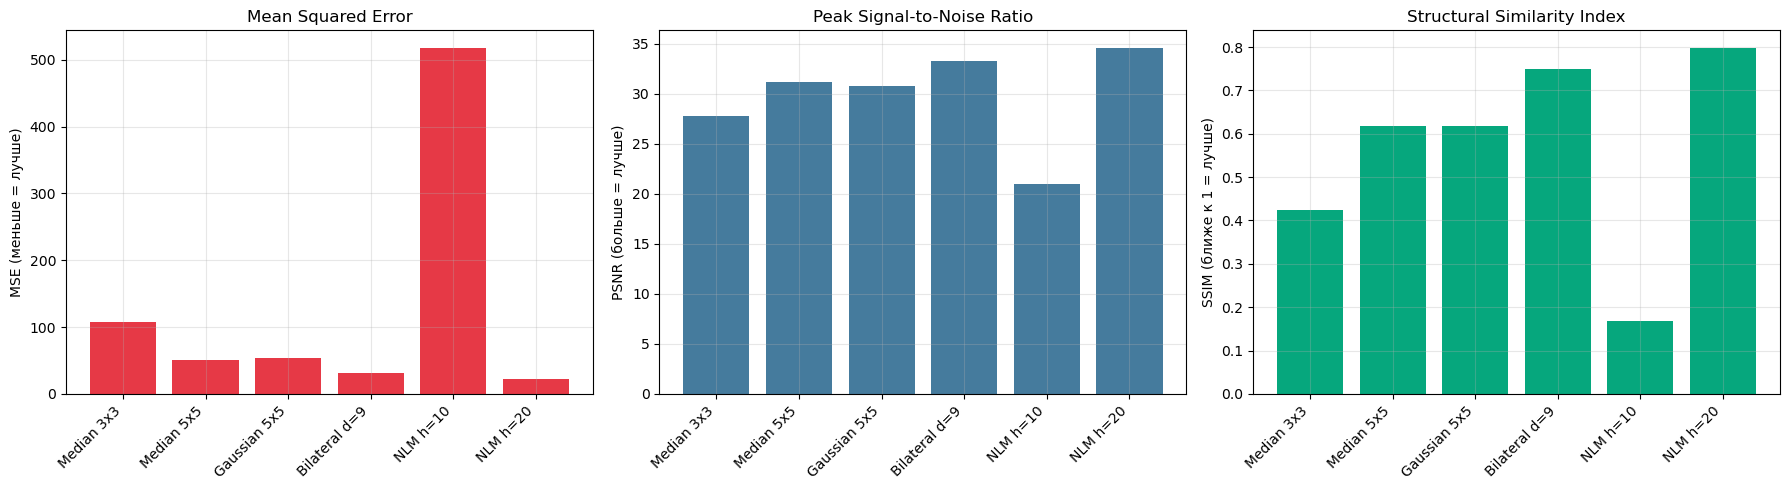

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# MSE
ax1.bar(range(len(filter_names)), mse_values, color='#E63946')
ax1.set_xticks(range(len(filter_names)))
ax1.set_xticklabels(filter_names, rotation=45, ha='right')
ax1.set_ylabel('MSE (меньше = лучше)')
ax1.set_title('Mean Squared Error')
ax1.grid(True, alpha=0.3)

# PSNR
ax2.bar(range(len(filter_names)), psnr_values, color='#457B9D')
ax2.set_xticks(range(len(filter_names)))
ax2.set_xticklabels(filter_names, rotation=45, ha='right')
ax2.set_ylabel('PSNR (больше = лучше)')
ax2.set_title('Peak Signal-to-Noise Ratio')
ax2.grid(True, alpha=0.3)

# SSIM
ax3.bar(range(len(filter_names)), ssim_values, color='#06A77D')
ax3.set_xticks(range(len(filter_names)))
ax3.set_xticklabels(filter_names, rotation=45, ha='right')
ax3.set_ylabel('SSIM (ближе к 1 = лучше)')
ax3.set_title('Structural Similarity Index')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Итоговое сравнение лучших результатов

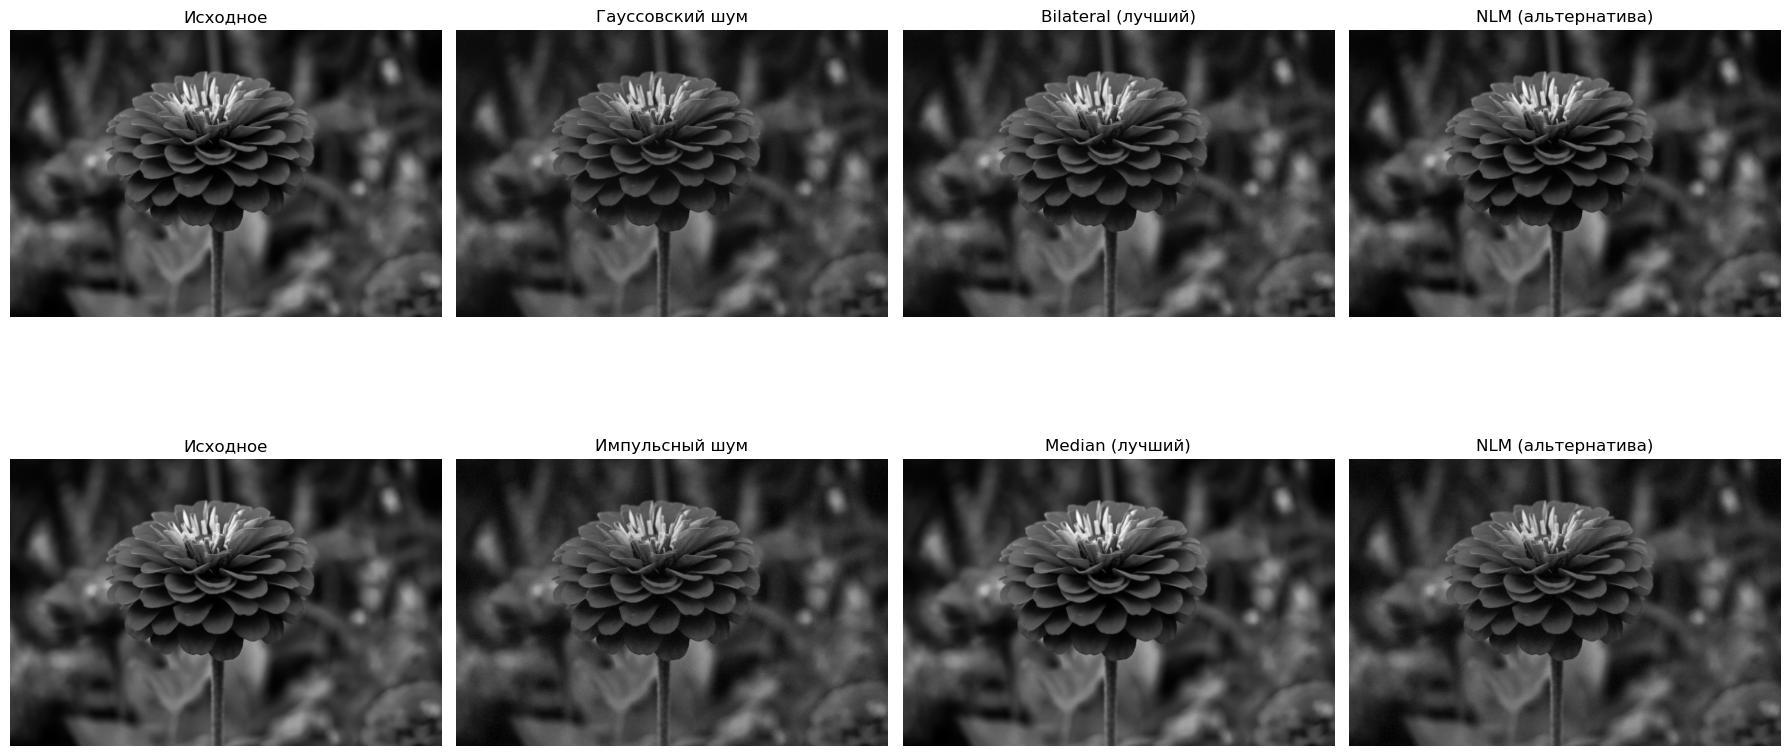

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

# Гауссовский шум
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title('Исходное')
axes[0, 0].axis('off')

axes[0, 1].imshow(noisy_gaussian, cmap='gray')
axes[0, 1].set_title('Гауссовский шум')
axes[0, 1].axis('off')

axes[0, 2].imshow(bilateral_9, cmap='gray')
axes[0, 2].set_title('Bilateral (лучший)')
axes[0, 2].axis('off')

axes[0, 3].imshow(nlm_strong, cmap='gray')
axes[0, 3].set_title('NLM (альтернатива)')
axes[0, 3].axis('off')

# Импульсный шум
axes[1, 0].imshow(image_gray, cmap='gray')
axes[1, 0].set_title('Исходное')
axes[1, 0].axis('off')

axes[1, 1].imshow(noisy_sp, cmap='gray')
axes[1, 1].set_title('Импульсный шум')
axes[1, 1].axis('off')

axes[1, 2].imshow(sp_median, cmap='gray')
axes[1, 2].set_title('Median (лучший)')
axes[1, 2].axis('off')

axes[1, 3].imshow(sp_nlm, cmap='gray')
axes[1, 3].set_title('NLM (альтернатива)')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

## 8. Выводы

In [ ]:
print("\n" + "="*70)
print("                    ВЫВОДЫ                    ")
print("="*70)

print("""
1. ДЛЯ ГАУССОВСКОГО ШУМА:
   • Билатериальный фильтр показывает лучшие результаты
   • Сохраняет края при удалении шума
   • Фильтр NLM также эффективен, но более медленный
   • Медианный фильтр менее эффективен для гауссовского шума

2. ДЛЯ ИМПУЛЬСНОГО ШУМА (Salt & Pepper):
   • Медианный фильтр - ЛУЧШИЙ выбор
   • Эффективно удаляет отдельные выбросы
   • Гауссовский фильтр размывает импульсы
   • NLM также показывает хорошие результаты

3. ОБЩИЕ РЕКОМЕНДАЦИИ:
   • Выбор фильтра зависит от типа шума
   • Билатериальный - универсальный для гладкого шума
   • Медианный - для импульсных помех
   • NLM - для максимального качества (но медленнее)

4. МЕТРИКИ:
   • MSE: меньше значение = лучше
   • PSNR: больше значение = лучше (обычно 20-40 dB)
   • SSIM: ближе к 1.0 = лучше структурное сходство
""")

print("="*70 + "\n")